In [21]:
import pandas as pd
import numpy as np

df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
correlation=df.corr()['quality'][:].drop(['quality'])
print(correlation)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
goodquality             0.710196
Name: quality, dtype: float64


In [26]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

0    1382
1     217
Name: goodquality, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='goodquality', ylabel='count'>

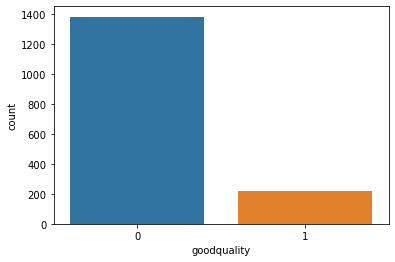

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['goodquality'].value_counts())
sns.countplot(df['goodquality'])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1071, 11) (528, 11) (1071,) (528,)


In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


[[ 1.20290618 -1.52035842  0.9979942  ... -0.83878708  2.18123614
   0.44053748]
 [-0.0237926  -1.52035842  0.74607288 ... -0.64915699  0.79882389
  -0.9736367 ]
 [ 1.09138811 -0.00280766  1.04837847 ... -1.21804727 -0.41078683
  -1.06791498]
 ...
 [-0.97169621  1.09320123 -0.91660786 ...  0.23578345 -0.98679194
   0.34625921]
 [-0.63714199  0.55924818 -1.37006624 ...  0.36220351 -0.46838735
  -1.35074981]
 [ 0.42227968 -0.73348025  1.149147   ... -0.64915699  0.16521827
   1.94898995]]
[[ 0.32395578 -0.62070055  1.98450709 ...  1.58829446  0.05156609
   0.09007658]
 [ 0.26249381  0.59434118  0.05856454 ... -0.32776799 -0.13534623
  -0.1891432 ]
 [ 1.30734724 -1.00730474  1.66351666 ... -0.8067836   0.30078251
   0.83466267]
 ...
 [-2.01159894 -0.67592972  1.23552943 ...  1.24614045  0.05156609
   2.97534768]
 [ 2.29073871 -0.84161723  2.62648794 ... -0.60149119 -0.32225855
   2.41690811]
 [-2.07306091 -0.56547138 -1.43939077 ...  2.75161809  0.54999893
   3.34764072]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       458
           1       0.72      0.44      0.55        70

    accuracy                           0.90       528
   macro avg       0.82      0.71      0.75       528
weighted avg       0.89      0.90      0.89       528

